<a href="https://colab.research.google.com/gist/Vidhi1290/36989ceeb78ebfa490e7d5e26df39b4b/multiple-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression

### Agenda
   
    ♦ Problem Description
    ♦ Data Understanding
    ♦ Split the data into Train and Validation sets
    ♦ Build a Multiple linear regression model
    ♦ Build a Multiple linear regression model after checking VIF values
    ♦ Build a Multiple linear regression model with StepAIC attributes
    ♦ Build a Multiple linear regression model on standardized independent attributes
    ♦ Predict on new data     

### Problem Description


An online gaming portal wants to understand their customer patterns based on their transactional behavior. 
For this, they have constructed a customer level data based on the details they are tracking. The customer database consists of demographic and transactional information for each customer. Build a regression model to predict 
the customer revenue.


### Data Reading

In [43]:
### Read data
data<-read.csv("CustomerData.csv",header=T)


### Data Understanding

Check the number of observations and attributes

Classify independent variables and dependent variable

In Linear Regression, the dependent variable is continuous variable.

For Multiple Linear Regression we will predict dependent variable with multiple independent variables.


In [44]:
## Dimensions

dim(data)

[1] 3209   14

In [45]:
## Structure

str(data)

'data.frame':	3209 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 ...
 $ City                        : int  1 1 1 1 1 1 1 1 1 2 ...
 $ NoOfChildren                : int  2 2 4 1 3 2 3 2 4 3 ...
 $ MinAgeOfChild               : int  3 3 3 6 6 3 8 6 6 5 ...
 $ MaxAgeOfChild               : int  8 6 5 6 9 4 12 8 9 6 ...
 $ Tenure                      : int  210 442 424 261 422 378 369 404 420 333 ...
 $ FrquncyOfPurchase           : int  11 20 18 11 44 16 25 13 20 15 ...
 $ NoOfUnitsPurchased          : int  11 20 18 9 31 16 15 12 16 15 ...
 $ FrequencyOFPlay             : int  2344 245 1059 365 1066 228 75 1488 2743 1967 ...
 $ NoOfGamesPlayed             : int  108 22 130 34 102 12 2 118 163 56 ...
 $ NoOfGamesBought             : int  10 7 18 11 44 16 25 13 16 15 ...
 $ FavoriteChannelOfTransaction: chr  "Uniform" "Favorite" "Favorite" "Favorite" ...
 $ FavoriteGame                : chr  "Uniform" "Uniform" "Uniform" "Unif

In [46]:
## First few rows

head(data)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
2,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
3,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
4,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
5,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05
6,1006,1,2,3,4,378,16,16,228,12,16,Favorite,Favorite,150.00


In [47]:
## Last few rows

tail(data)

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
3204,4204,1,1,4,4,431,26,26,1166,72,26,Favorite,Uniform,205.00
3205,4205,1,2,4,6,365,16,16,827,78,16,Favorite,Uniform,132.50
3206,4206,1,2,2,5,348,20,20,2933,294,13,Favorite,Uniform,223.23
3207,4207,1,2,5,7,341,16,13,1250,126,16,Uniform,Uniform,120.00
3208,4208,1,2,6,7,368,18,14,1364,122,18,Favorite,Uniform,161.50
3209,4209,1,3,2,6,389,25,17,475,111,25,Favorite,Uniform,137.50


### Summary Statistics

In [48]:
## Summary of the data
summary(data)

   CustomerID        City        NoOfChildren    MinAgeOfChild    
 Min.   :1001   Min.   :1.000   Min.   : 1.000   Min.   :  0.000  
 1st Qu.:1803   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.:  4.000  
 Median :2605   Median :1.000   Median : 2.000   Median :  5.000  
 Mean   :2605   Mean   :1.114   Mean   : 2.128   Mean   :  4.961  
 3rd Qu.:3407   3rd Qu.:1.000   3rd Qu.: 3.000   3rd Qu.:  6.000  
 Max.   :4209   Max.   :2.000   Max.   :11.000   Max.   :113.000  
 MaxAgeOfChild         Tenure      FrquncyOfPurchase NoOfUnitsPurchased
 Min.   :  3.000   Min.   :100.0   Min.   :  1.00    Min.   :  1.00    
 1st Qu.:  6.000   1st Qu.:301.0   1st Qu.: 11.00    1st Qu.: 10.00    
 Median :  7.000   Median :368.0   Median : 14.00    Median : 13.00    
 Mean   :  7.991   Mean   :347.5   Mean   : 16.27    Mean   : 14.68    
 3rd Qu.:  8.000   3rd Qu.:417.0   3rd Qu.: 19.00    3rd Qu.: 17.00    
 Max.   :113.000   Max.   :472.0   Max.   :119.00    Max.   :112.00    
 FrequencyOFPlay NoOfGamesP

#### Drop rows where MaxAgeOfChild and MinAgeOfChild are > 100

In [49]:
data = data[(data$MaxAgeOfChild < 100) & (data$MinAgeOfChild < 100) ,]

In [50]:
summary(data)

   CustomerID        City        NoOfChildren    MinAgeOfChild   
 Min.   :1001   Min.   :1.000   Min.   : 1.000   Min.   : 0.000  
 1st Qu.:1801   1st Qu.:1.000   1st Qu.: 1.000   1st Qu.: 4.000  
 Median :2604   Median :1.000   Median : 2.000   Median : 5.000  
 Mean   :2605   Mean   :1.115   Mean   : 2.125   Mean   : 4.859  
 3rd Qu.:3409   3rd Qu.:1.000   3rd Qu.: 3.000   3rd Qu.: 6.000  
 Max.   :4209   Max.   :2.000   Max.   :11.000   Max.   :18.000  
 MaxAgeOfChild        Tenure      FrquncyOfPurchase NoOfUnitsPurchased
 Min.   : 3.000   Min.   :100.0   Min.   :  1.00    Min.   :  1.00    
 1st Qu.: 6.000   1st Qu.:302.0   1st Qu.: 11.00    1st Qu.: 10.00    
 Median : 7.000   Median :368.0   Median : 14.00    Median : 13.00    
 Mean   : 7.332   Mean   :347.7   Mean   : 16.27    Mean   : 14.68    
 3rd Qu.: 8.000   3rd Qu.:417.0   3rd Qu.: 19.00    3rd Qu.: 17.00    
 Max.   :23.000   Max.   :472.0   Max.   :119.00    Max.   :112.00    
 FrequencyOFPlay NoOfGamesPlayed   NoOfGa

### Split the data into Train and Validation sets

In [51]:
## Split row numbers into 2 sets
set.seed(1)
train_rows = sample(1:nrow(data), size=0.7*nrow(data))
validation_rows = setdiff(1:nrow(data),train_rows)

In [52]:
## Subset into Train and Validation sets
train_data <- data[train_rows,]
validation_data <- data[validation_rows,]

In [53]:
## View the dimensions of the data
dim(data)
dim(train_data)
dim(validation_data)

[1] 3189   14

[1] 2232   14

[1] 957  14

### Data Type Conversion
Check if any data type conversions have to be done.


In [54]:
str(train_data)

'data.frame':	2232 obs. of  14 variables:
 $ CustomerID                  : int  2023 1682 3192 1936 2542 1471 3364 1270 2219 1599 ...
 $ City                        : int  1 1 1 1 1 1 1 2 1 1 ...
 $ NoOfChildren                : int  1 2 2 2 3 5 3 2 2 1 ...
 $ MinAgeOfChild               : int  5 4 4 5 5 1 6 3 5 7 ...
 $ MaxAgeOfChild               : int  5 9 6 7 10 5 21 6 5 7 ...
 $ Tenure                      : int  398 406 313 367 432 464 261 365 187 241 ...
 $ FrquncyOfPurchase           : int  15 8 10 27 24 22 21 13 12 22 ...
 $ NoOfUnitsPurchased          : int  15 8 8 15 20 19 13 13 12 13 ...
 $ FrequencyOFPlay             : int  241 396 370 2161 1413 348 558 2424 476 358 ...
 $ NoOfGamesPlayed             : int  32 45 10 108 127 87 54 69 39 42 ...
 $ NoOfGamesBought             : int  15 8 6 27 24 21 21 13 12 22 ...
 $ FavoriteChannelOfTransaction: chr  "Favorite" "Favorite" "Uniform" "Favorite" ...
 $ FavoriteGame                : chr  "Uniform" "Uniform" "Uniform" "Uniform" .

In [55]:
str(validation_data)

'data.frame':	957 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1006 1018 1020 1021 1024 1025 1030 1031 ...
 $ City                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfChildren                : int  2 2 2 1 2 3 1 2 5 1 ...
 $ MinAgeOfChild               : int  3 3 3 7 4 4 4 5 2 7 ...
 $ MaxAgeOfChild               : int  8 6 4 7 7 10 4 7 7 7 ...
 $ Tenure                      : int  210 442 378 346 278 448 189 427 444 126 ...
 $ FrquncyOfPurchase           : int  11 20 16 18 12 6 22 16 26 8 ...
 $ NoOfUnitsPurchased          : int  11 20 16 16 12 6 18 16 26 8 ...
 $ FrequencyOFPlay             : int  2344 245 228 1029 1080 1016 267 3781 7766 515 ...
 $ NoOfGamesPlayed             : int  108 22 12 106 49 56 33 288 583 21 ...
 $ NoOfGamesBought             : int  10 7 16 14 8 6 12 16 26 8 ...
 $ FavoriteChannelOfTransaction: chr  "Uniform" "Favorite" "Favorite" "Uniform" ...
 $ FavoriteGame                : chr  "Uniform" "Uniform" "Favorite" "Uniform" .

In [56]:
#Convert "City" to factor variable
train_data$City <- as.factor(as.character(train_data$City))
validation_data$City  <- as.factor(as.character(validation_data$City))

#Convert "FavoriteChannelOfTransaction" to factor variable
train_data$FavoriteChannelOfTransaction <- as.factor(train_data$FavoriteChannelOfTransaction)
validation_data$FavoriteChannelOfTransaction  <- as.factor(validation_data$FavoriteChannelOfTransaction)

#Convert "FavoriteGame" to factor variable
train_data$FavoriteGame <- as.factor(train_data$FavoriteGame)
validation_data$FavoriteGame  <- as.factor(validation_data$FavoriteGame)

In [57]:
str(train_data)

'data.frame':	2232 obs. of  14 variables:
 $ CustomerID                  : int  2023 1682 3192 1936 2542 1471 3364 1270 2219 1599 ...
 $ City                        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 2 1 1 ...
 $ NoOfChildren                : int  1 2 2 2 3 5 3 2 2 1 ...
 $ MinAgeOfChild               : int  5 4 4 5 5 1 6 3 5 7 ...
 $ MaxAgeOfChild               : int  5 9 6 7 10 5 21 6 5 7 ...
 $ Tenure                      : int  398 406 313 367 432 464 261 365 187 241 ...
 $ FrquncyOfPurchase           : int  15 8 10 27 24 22 21 13 12 22 ...
 $ NoOfUnitsPurchased          : int  15 8 8 15 20 19 13 13 12 13 ...
 $ FrequencyOFPlay             : int  241 396 370 2161 1413 348 558 2424 476 358 ...
 $ NoOfGamesPlayed             : int  32 45 10 108 127 87 54 69 39 42 ...
 $ NoOfGamesBought             : int  15 8 6 27 24 21 21 13 12 22 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 1 1 2 1 1 2 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 

In [58]:
str(validation_data)

'data.frame':	957 obs. of  14 variables:
 $ CustomerID                  : int  1001 1002 1006 1018 1020 1021 1024 1025 1030 1031 ...
 $ City                        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfChildren                : int  2 2 2 1 2 3 1 2 5 1 ...
 $ MinAgeOfChild               : int  3 3 3 7 4 4 4 5 2 7 ...
 $ MaxAgeOfChild               : int  8 6 4 7 7 10 4 7 7 7 ...
 $ Tenure                      : int  210 442 378 346 278 448 189 427 444 126 ...
 $ FrquncyOfPurchase           : int  11 20 16 18 12 6 22 16 26 8 ...
 $ NoOfUnitsPurchased          : int  11 20 16 16 12 6 18 16 26 8 ...
 $ FrequencyOFPlay             : int  2344 245 228 1029 1080 1016 267 3781 7766 515 ...
 $ NoOfGamesPlayed             : int  108 22 12 106 49 56 33 288 583 21 ...
 $ NoOfGamesBought             : int  10 7 16 14 8 6 12 16 26 8 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 2 1 1 2 2 1 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 

#### Remove columns not used in model building

In [59]:
#Note: Apply the same data pre processing steps on validation & test data, that u have done on train data

### Removing ID columns
train_data$CustomerID <- NULL #Remove ID columns as they won't be used in model building
validation_data$CustomerID <- NULL


### Model Building

#### Model with Multicollinearity check using Variance inflation factor

In [60]:
# Build a model with all attributes
model1<- lm(TotalRevenueGenerated~., data = train_data)

summary(model1)


Call:
lm(formula = TotalRevenueGenerated ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-159.47  -26.99   -4.75   21.06  341.93 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.711e+01  7.398e+00   3.665 0.000253 ***
City2                                1.127e+01  2.946e+00   3.826 0.000134 ***
NoOfChildren                         5.112e+00  1.240e+00   4.122 3.90e-05 ***
MinAgeOfChild                        4.147e+00  6.826e-01   6.076 1.45e-09 ***
MaxAgeOfChild                       -1.534e+00  4.305e-01  -3.563 0.000375 ***
Tenure                              -1.130e-02  1.072e-02  -1.054 0.291799    
FrquncyOfPurchase                    9.755e+00  5.125e-01  19.032  < 2e-16 ***
NoOfUnitsPurchased                   9.259e+00  3.777e-01  24.513  < 2e-16 ***
FrequencyOFPlay                      3.035e-03  7.354e-04   4.128 3.80e-05 ***
NoOfGamesPlayed                    

In [61]:
options(scipen=999)

# Build a model with all attributes
model1<- lm(TotalRevenueGenerated~., data = train_data)

summary(model1)



Call:
lm(formula = TotalRevenueGenerated ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-159.47  -26.99   -4.75   21.06  341.93 

Coefficients:
                                       Estimate  Std. Error t value
(Intercept)                          27.1103680   7.3976859   3.665
City2                                11.2721204   2.9464824   3.826
NoOfChildren                          5.1119290   1.2402984   4.122
MinAgeOfChild                         4.1470847   0.6825814   6.076
MaxAgeOfChild                        -1.5337873   0.4304930  -3.563
Tenure                               -0.0113022   0.0107187  -1.054
FrquncyOfPurchase                     9.7548434   0.5125460  19.032
NoOfUnitsPurchased                    9.2590076   0.3777206  24.513
FrequencyOFPlay                       0.0030354   0.0007354   4.128
NoOfGamesPlayed                      -0.0357952   0.0159971  -2.238
NoOfGamesBought                     -10.7413676   0.3528406 -30.443
FavoriteC

In [62]:
levels(train_data$City)
levels(train_data$FavoriteChannelOfTransaction)
levels(train_data$FavoriteGame)

[1] "1" "2"

[1] "Favorite" "Uniform"

[1] "Favorite" "Uniform"

In [63]:
## Compute VIF 
install.packages("car")
library(car)

vif(model1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



City                 NoOfChildren 
                    1.082399                     1.900549 
               MinAgeOfChild                MaxAgeOfChild 
                    1.576745                     1.742606 
                      Tenure            FrquncyOfPurchase 
                    1.108047                    21.805069 
          NoOfUnitsPurchased              FrequencyOFPlay 
                    8.787353                     2.103375 
             NoOfGamesPlayed              NoOfGamesBought 
                    2.402156                    11.283109 
FavoriteChannelOfTransaction                 FavoriteGame 
                    1.078117                     1.042442

In [64]:
#We see FrquncyOfPurchase and NoOfGamesBought have VIF >10; So ignoring them for model building

options(scipen=0)

model_vif <- lm(TotalRevenueGenerated ~ City + NoOfChildren + MinAgeOfChild + 
              MaxAgeOfChild + Tenure + NoOfUnitsPurchased + 
              FrequencyOFPlay + NoOfGamesPlayed  + FavoriteChannelOfTransaction + 
              FavoriteGame, data=train_data)
summary(model_vif)



Call:
lm(formula = TotalRevenueGenerated ~ City + NoOfChildren + MinAgeOfChild + 
    MaxAgeOfChild + Tenure + NoOfUnitsPurchased + FrequencyOFPlay + 
    NoOfGamesPlayed + FavoriteChannelOfTransaction + FavoriteGame, 
    data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-127.29  -32.17   -9.94   16.21  399.29 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          5.874e+01  8.808e+00   6.669 3.23e-11 ***
City2                               -4.751e+00  3.461e+00  -1.373 0.169961    
NoOfChildren                         2.707e+00  1.488e+00   1.820 0.068959 .  
MinAgeOfChild                        2.474e+00  8.173e-01   3.027 0.002501 ** 
MaxAgeOfChild                       -5.579e-01  5.160e-01  -1.081 0.279719    
Tenure                              -1.324e-02  1.287e-02  -1.029 0.303433    
NoOfUnitsPurchased                   8.589e+00  1.712e-01  50.164  < 2e-16 ***
FrequencyOFPlay 

#### Model 4 : Using StepAIC

In [65]:
# Stepwise Regression
library(MASS)
stepAIC(model1)


Start:  AIC=16882.18
TotalRevenueGenerated ~ City + NoOfChildren + MinAgeOfChild + 
    MaxAgeOfChild + Tenure + FrquncyOfPurchase + NoOfUnitsPurchased + 
    FrequencyOFPlay + NoOfGamesPlayed + NoOfGamesBought + FavoriteChannelOfTransaction + 
    FavoriteGame

                               Df Sum of Sq     RSS   AIC
- Tenure                        1      2130 4253298 16881
<none>                                      4251168 16882
- NoOfGamesPlayed               1      9592 4260760 16885
- FavoriteGame                  1     11292 4262460 16886
- MaxAgeOfChild                 1     24319 4275487 16893
- City                          1     28038 4279206 16895
- NoOfChildren                  1     32544 4283712 16897
- FrequencyOFPlay               1     32642 4283810 16897
- FavoriteChannelOfTransaction  1     51498 4302666 16907
- MinAgeOfChild                 1     70718 4321885 16917
- FrquncyOfPurchase             1    693946 4945114 17218
- NoOfUnitsPurchased            1   11511


Call:
lm(formula = TotalRevenueGenerated ~ City + NoOfChildren + MinAgeOfChild + 
    MaxAgeOfChild + FrquncyOfPurchase + NoOfUnitsPurchased + 
    FrequencyOFPlay + NoOfGamesPlayed + NoOfGamesBought + FavoriteChannelOfTransaction + 
    FavoriteGame, data = train_data)

Coefficients:
                        (Intercept)                                City2  
                          23.327636                            11.037344  
                       NoOfChildren                        MinAgeOfChild  
                           5.129305                             4.227552  
                      MaxAgeOfChild                    FrquncyOfPurchase  
                          -1.537087                             9.736171  
                 NoOfUnitsPurchased                      FrequencyOFPlay  
                           9.264427                             0.002972  
                    NoOfGamesPlayed                      NoOfGamesBought  
                          -0.037106   

In [66]:
## Build model with AIC call
model_aic <- lm(formula = TotalRevenueGenerated ~ City + NoOfChildren + MinAgeOfChild + 
    MaxAgeOfChild + FrquncyOfPurchase + NoOfUnitsPurchased + 
    FrequencyOFPlay + NoOfGamesPlayed + NoOfGamesBought + FavoriteChannelOfTransaction + 
    FavoriteGame, data = train_data)

summary(model_aic)


Call:
lm(formula = TotalRevenueGenerated ~ City + NoOfChildren + MinAgeOfChild + 
    MaxAgeOfChild + FrquncyOfPurchase + NoOfUnitsPurchased + 
    FrequencyOFPlay + NoOfGamesPlayed + NoOfGamesBought + FavoriteChannelOfTransaction + 
    FavoriteGame, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.97  -27.12   -4.65   20.92  342.12 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.333e+01  6.470e+00   3.606 0.000318 ***
City2                                1.104e+01  2.938e+00   3.757 0.000177 ***
NoOfChildren                         5.129e+00  1.240e+00   4.136 3.67e-05 ***
MinAgeOfChild                        4.228e+00  6.783e-01   6.232 5.48e-10 ***
MaxAgeOfChild                       -1.537e+00  4.305e-01  -3.571 0.000364 ***
FrquncyOfPurchase                    9.736e+00  5.123e-01  19.007  < 2e-16 ***
NoOfUnitsPurchased                   9.264e+00  3.777e-01  24.529 

General Note: One can try different models in a variety of combinations. As long as the model's overall significance is good,one can choose the model for prediction. And, one can finalize a model based on its performance on the test data(and explicability, if needed)


#### Standardizing the Data

In [67]:
str(train_data)

'data.frame':	2232 obs. of  13 variables:
 $ City                        : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 2 1 1 ...
 $ NoOfChildren                : int  1 2 2 2 3 5 3 2 2 1 ...
 $ MinAgeOfChild               : int  5 4 4 5 5 1 6 3 5 7 ...
 $ MaxAgeOfChild               : int  5 9 6 7 10 5 21 6 5 7 ...
 $ Tenure                      : int  398 406 313 367 432 464 261 365 187 241 ...
 $ FrquncyOfPurchase           : int  15 8 10 27 24 22 21 13 12 22 ...
 $ NoOfUnitsPurchased          : int  15 8 8 15 20 19 13 13 12 13 ...
 $ FrequencyOFPlay             : int  241 396 370 2161 1413 348 558 2424 476 358 ...
 $ NoOfGamesPlayed             : int  32 45 10 108 127 87 54 69 39 42 ...
 $ NoOfGamesBought             : int  15 8 6 27 24 21 21 13 12 22 ...
 $ FavoriteChannelOfTransaction: Factor w/ 2 levels "Favorite","Uniform": 1 1 2 1 1 2 1 1 1 1 ...
 $ FavoriteGame                : Factor w/ 2 levels "Favorite","Uniform": 2 2 2 2 2 2 2 2 2 2 ...
 $ TotalRevenueGenerated       : num 

In [68]:
# We will use the Caret pakcage to standardize the data after the split using the __"preProcess()"__ function
#It saves the metrics such as mean and standard deviation used for calculating the standardized value by creating a model object
#We can then use the model object in the "predict()"  function to standardize any other unseen dataset with the same distribuiton and variables

install.packages("caret")
library(caret)

# The "preProcess()" function creates a model object required for standardizing unseen data
# Do not standardize the target variable

train_nonstd = train_data
test_nonstd = validation_data


library(dplyr)
num_cols = colnames(select_if(train_data,is.numeric))
independent_num_cols = setdiff(num_cols,"TotalRevenueGenerated")

std_model <- preProcess(train_data[, independent_num_cols], method = c("center","scale"))
std_model

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Created from 2232 samples and 9 variables

Pre-processing:
  - centered (9)
  - ignored (0)
  - scaled (9)


In [69]:
std_model$mean

NoOfChildren      MinAgeOfChild      MaxAgeOfChild             Tenure 
          2.110215           4.884857           7.331093         347.653226 
 FrquncyOfPurchase NoOfUnitsPurchased    FrequencyOFPlay    NoOfGamesPlayed 
         16.167115          14.646505        1578.414875          94.111111 
   NoOfGamesBought 
         14.708333

In [70]:
std_model$std

NoOfChildren      MinAgeOfChild      MaxAgeOfChild             Tenure 
          1.030004           1.704715           2.841575          91.004346 
 FrquncyOfPurchase NoOfUnitsPurchased    FrequencyOFPlay    NoOfGamesPlayed 
          8.442509           7.272505        1827.581121          89.780909 
   NoOfGamesBought 
          8.821887

In [71]:
head(train_data)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<dbl>
1023,1,1,5,5,398,15,15,241,32,15,Favorite,Uniform,145.00
682,1,2,4,9,406,8,8,396,45,8,Favorite,Uniform,100.00
2192,1,2,4,6,313,10,8,370,10,6,Uniform,Uniform,126.99
936,1,2,5,7,367,27,15,2161,108,27,Favorite,Uniform,240.00
1542,1,3,5,10,432,24,20,1413,127,24,Favorite,Uniform,187.52
471,1,5,1,5,464,22,19,348,87,21,Uniform,Uniform,142.50


In [38]:
(1-2.11021505376344)/1.03000417696259

[1] -1.077874

In [39]:
# The predict() function is used to standardize any data

train_data[, independent_num_cols] <- predict(object = std_model, newdata = train_data[, independent_num_cols])
head(train_data)


,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1023,1,-1.0778743,0.06754404,-0.8203524,0.5532348,-0.1382426,0.0486070,-0.73179508,-0.69180756,0.03306171,Favorite,Uniform,145.00
682,1,-0.1070045,-0.51906412,0.5873175,0.6411427,-0.9673800,-0.9139224,-0.64698352,-0.54701063,-0.76041930,Favorite,Uniform,100.00
2192,1,-0.1070045,-0.51906412,-0.4684349,-0.3807865,-0.7304836,-0.9139224,-0.66120998,-0.93684852,-0.98712816,Uniform,Uniform,126.99
936,1,-0.1070045,0.06754404,-0.1165175,0.2125918,1.2831358,0.0486070,0.31877388,0.15469758,1.39331487,Favorite,Uniform,240.00
1542,1,0.8638654,0.06754404,0.9392349,0.9268434,0.9277912,0.7361280,-0.09051028,0.36632386,1.05325158,Favorite,Uniform,187.52
471,1,2.8056051,-2.27888862,-0.8203524,1.2784749,0.6908948,0.5986238,-0.67324775,-0.07920516,0.71318829,Uniform,Uniform,142.50


In [40]:
## standardize validation data

validation_data[, independent_num_cols] <- predict(object = std_model, newdata = validation_data[, independent_num_cols])
head(validation_data)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,1,-0.1070045,-1.1056723,0.2354000,-1.51260058,-0.61203543,-0.5014098,0.4189062,0.1546976,-0.53371044,Uniform,Uniform,107.51
2,1,-0.1070045,-1.1056723,-0.4684349,1.03672823,0.45399836,0.7361280,-0.7296064,-0.8031898,-0.87377373,Favorite,Uniform,382.40
6,1,-0.1070045,-1.1056723,-1.1722699,0.33346511,-0.01979443,0.1861112,-0.7389083,-0.9145721,0.14641614,Favorite,Favorite,150.00
18,1,-1.0778743,1.2407604,-0.1165175,-0.01816645,0.21710196,0.1861112,-0.3006241,0.1324211,-0.08029272,Uniform,Uniform,181.71
20,1,-0.1070045,-0.5190641,-0.1165175,-0.76538351,-0.49358723,-0.3639056,-0.2727183,-0.5024577,-0.76041930,Uniform,Uniform,182.36
21,1,0.8638654,-0.5190641,0.9392349,1.10265915,-1.20427643,-1.1889308,-0.3077373,-0.4244901,-0.98712816,Favorite,Uniform,100.00


In [41]:
# Build linear regression with all standardized attributes 
LinReg_std <- lm(TotalRevenueGenerated~., data=train_data)

summary(LinReg_std)


Call:
lm(formula = TotalRevenueGenerated ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-159.47  -26.99   -4.75   21.06  341.93 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         179.7366     4.7142  38.127  < 2e-16 ***
City2                                11.2721     2.9465   3.826 0.000134 ***
NoOfChildren                          5.2653     1.2775   4.122 3.90e-05 ***
MinAgeOfChild                         7.0696     1.1636   6.076 1.45e-09 ***
MaxAgeOfChild                        -4.3584     1.2233  -3.563 0.000375 ***
Tenure                               -1.0285     0.9754  -1.054 0.291799    
FrquncyOfPurchase                    82.3554     4.3272  19.032  < 2e-16 ***
NoOfUnitsPurchased                   67.3362     2.7470  24.513  < 2e-16 ***
FrequencyOFPlay                       5.5475     1.3440   4.128 3.80e-05 ***
NoOfGamesPlayed                      -3.2137     1.4362

In [74]:
library(devtools)
install_github("cran/DMwR")

library(DMwR)
## Predict Train
train_data_preds_std = LinReg_std$fitted.values

## Eval metrics
regr.eval(train_data$TotalRevenueGenerated,train_data_preds_std)

Loading required package: usethis




caTools  (NA -> 1.18.2) [CRAN]
gtools   (NA -> 3.9.4 ) [CRAN]
zoo      (NA -> 1.8-11) [CRAN]
xts      (NA -> 0.12.2) [CRAN]
gplots   (NA -> 3.1.3 ) [CRAN]
TTR      (NA -> 0.24.3) [CRAN]
ROCR     (NA -> 1.0-11) [CRAN]
quantmod (NA -> 0.4.20) [CRAN]


Installing 8 packages: caTools, gtools, zoo, xts, gplots, TTR, ROCR, quantmod

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmpe7Ex8n/remotes492f03721c/cran-DMwR-6fd4f0c/DESCRIPTION’ ... OK
* preparing ‘DMwR’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘DMwR_0.4.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



mae          mse         rmse         mape 
  31.6678662 1904.6450554   43.6422393    0.1918405

In [75]:
mean(train_data$TotalRevenueGenerated)

[1] 167.6655

In [76]:
sd(train_data$TotalRevenueGenerated)

[1] 81.30141

In [77]:
## Predict Validation
validation_data_preds_std = predict(object = LinReg_std,newdata = validation_data)

## Eval Metrics
regr.eval(validation_data$TotalRevenueGenerated,validation_data_preds_std)

mae          mse         rmse         mape 
8.832348e+03 1.702920e+08 1.304960e+04 5.521101e+01

#### Predict on new data

In [82]:
new_data = read.csv("New_data.csv")


In [83]:
head(new_data)

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,1,2,8,9,101,30,18,97,13,30,Uniform,Uniform
2,1,1,5,5,102,11,11,160,12,8,Favorite,Uniform
3,1,1,4,4,102,11,11,114,23,11,Favorite,Uniform
4,1,3,8,22,103,29,16,819,79,29,Uniform,Uniform
5,1,4,4,6,103,23,20,201,22,23,Favorite,Uniform
6,1,3,4,8,105,15,15,2667,81,15,Favorite,Uniform


In [84]:
str(new_data)

'data.frame':	500 obs. of  12 variables:
 $ City                        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NoOfChildren                : int  2 1 1 3 4 3 2 2 2 1 ...
 $ MinAgeOfChild               : int  8 5 4 8 4 4 6 4 4 7 ...
 $ MaxAgeOfChild               : int  9 5 4 22 6 8 7 6 7 7 ...
 $ Tenure                      : int  101 102 102 103 103 105 105 106 108 109 ...
 $ FrquncyOfPurchase           : int  30 11 11 29 23 15 8 16 13 12 ...
 $ NoOfUnitsPurchased          : int  18 11 11 16 20 15 8 16 12 11 ...
 $ FrequencyOFPlay             : int  97 160 114 819 201 2667 577 375 130 126 ...
 $ NoOfGamesPlayed             : int  13 12 23 79 22 81 42 41 13 24 ...
 $ NoOfGamesBought             : int  30 8 11 29 23 15 8 8 13 9 ...
 $ FavoriteChannelOfTransaction: chr  "Uniform" "Favorite" "Favorite" "Uniform" ...
 $ FavoriteGame                : chr  "Uniform" "Uniform" "Uniform" "Uniform" ...


In [85]:
#Convert "City" to factor variable
new_data$City <- as.factor(as.character(new_data$City))

#Convert "FavoriteChannelOfTransaction" to factor variable
new_data$FavoriteChannelOfTransaction <- as.factor(new_data$FavoriteChannelOfTransaction)

#Convert "FavoriteGame" to factor variable
new_data$FavoriteGame <- as.factor(new_data$FavoriteGame)


In [88]:
## Standardize data
new_data[, independent_num_cols] <- predict(object = std_model, newdata = new_data[, independent_num_cols])


In [89]:
## Predict on new data

new_data_predictions = predict(object = LinReg_std,newdata = new_data)


In [90]:
new_data_predictions

1         2         3         4         5         6         7         8 
167.75373 155.80088 120.43010 135.20143 204.47967 163.24816  92.01433 236.77609 
        9        10        11        12        13        14        15        16 
115.47089 146.33464 121.57607 194.47179 146.34920 122.13469 168.58617 132.05805 
       17        18        19        20        21        22        23        24 
121.45941 106.19688 232.99509 144.64152 157.72165 126.73092 128.34518 205.93916 
       25        26        27        28        29        30        31        32 
116.30650 171.13874 106.24482 131.25244 110.41650 137.46339 119.91435 163.88866 
       33        34        35        36        37        38        39        40 
140.95372 146.01387 133.89278 165.54699 111.66659 246.49114 106.39509 137.12870 
       41        42        43        44        45        46        47        48 
157.22203 111.34212  92.67244 138.98080 173.49109 131.48251 227.76410 151.96359 
       49        50        51        52        53        54        55        56 
244.68843  83.68543 126.10710 116.66445 257.04516 122.66503 121.35630 125.33589 
       57        58        59        60        61        62        63        64 
174.27538 153.54019 207.67076 134.72791 200.85232 123.05288 106.91766 121.58947 
       65        66        67        68        69        70        71        72 
210.40571 227.74779 148.53132 165.84888 153.82180 118.65012 124.40767 168.93749 
       73        74        75        76        77        78        79        80 
146.86700 130.65393 167.89129 154.47075 129.29999 136.82778 138.66164 131.58318 
       81        82        83        84        85        86        87        88 
215.64979 156.13083 118.88999 123.50255 112.50492 196.45872 160.48721 255.66393 
       89        90        91        92        93        94        95        96 
138.37875 219.19880 126.22388 162.55164 144.69040 174.66708 166.66523 166.86349 
       97        98        99       100       101       102       103       104 
113.58645 187.73810  86.10784 202.07319 127.04213 103.38581 265.21504 148.47145 
      105       106       107       108       109       110       111       112 
103.13196 158.86286 191.45118 162.50297  95.59625 165.40417 115.41249 166.92629 
      113       114       115       116       117       118       119       120 
238.86051  99.84026 166.21971 112.22047 113.23050 175.17598 156.39354 189.67504 
      121       122       123       124       125       126       127       128 
128.89881 140.24557 116.75485 110.44154 228.43639  87.14594 143.97727 113.99141 
      129       130       131       132       133       134       135       136 
101.39056 152.78278 224.16052 229.83977 101.19813 160.66693 142.52396 167.59956 
      137       138       139       140       141       142       143       144 
107.77280  69.82546 146.27938 117.93355 150.05739 194.33776 173.49656  98.89847 
      145       146       147       148       149       150       151       152 
165.43043 268.83861 141.63608 118.07731 114.44950  46.84045 309.92255 124.75602 
      153       154       155       156       157       158       159       160 
145.08404 102.69553 153.54652 235.33433 129.98292 112.36309  95.40730 115.12745 
      161       162       163       164       165       166       167       168 
103.81487 133.39518 145.12209 252.18078 107.96609 109.68012 205.48372 157.61920 
      169       170       171       172       173       174       175       176 
335.87164 129.78675 104.30715 122.58325 107.65715 155.77814 192.88591 132.44722 
      177       178       179       180       181       182       183       184 
124.90627 161.22416 146.97890 172.65453 156.88930 138.04612 147.78999 105.70978 
      185       186       187       188       189       190       191       192 
 84.15273 119.96755 135.29629 188.07465 152.01853 176.89708 208.93700 122.29285 
      193       194       195       196       197       198       199       200 
101.79888 217.57679 311.92460 422.66040

#### Log Transformed Target

In [91]:
train_data_log = train_data
validation_data_log = validation_data

train_data_log$TotalRevenueGenerated = log(train_data_log$TotalRevenueGenerated)
validation_data_log$TotalRevenueGenerated = log(validation_data_log$TotalRevenueGenerated)

In [93]:
#Now build a model on the new clean data, with all attributes
model_log <- lm(TotalRevenueGenerated~., data = train_data_log)
summary(model_log)


Call:
lm(formula = TotalRevenueGenerated ~ ., data = train_data_log)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55567 -0.15451 -0.02813  0.14087  1.05084 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          4.441e+00  3.744e-02 118.604  < 2e-16 ***
City2                                4.050e-02  1.491e-02   2.716 0.006665 ** 
NoOfChildren                         1.959e-02  6.278e-03   3.121 0.001829 ** 
MinAgeOfChild                        1.745e-02  3.455e-03   5.052 4.72e-07 ***
MaxAgeOfChild                       -6.195e-03  2.179e-03  -2.843 0.004509 ** 
Tenure                              -1.844e-05  5.425e-05  -0.340 0.733956    
FrquncyOfPurchase                    5.078e-02  2.594e-03  19.575  < 2e-16 ***
NoOfUnitsPurchased                   3.327e-02  1.912e-03  17.400  < 2e-16 ***
FrequencyOFPlay                      1.381e-05  3.722e-06   3.710 0.000213 ***
NoOfGamesPlayed      

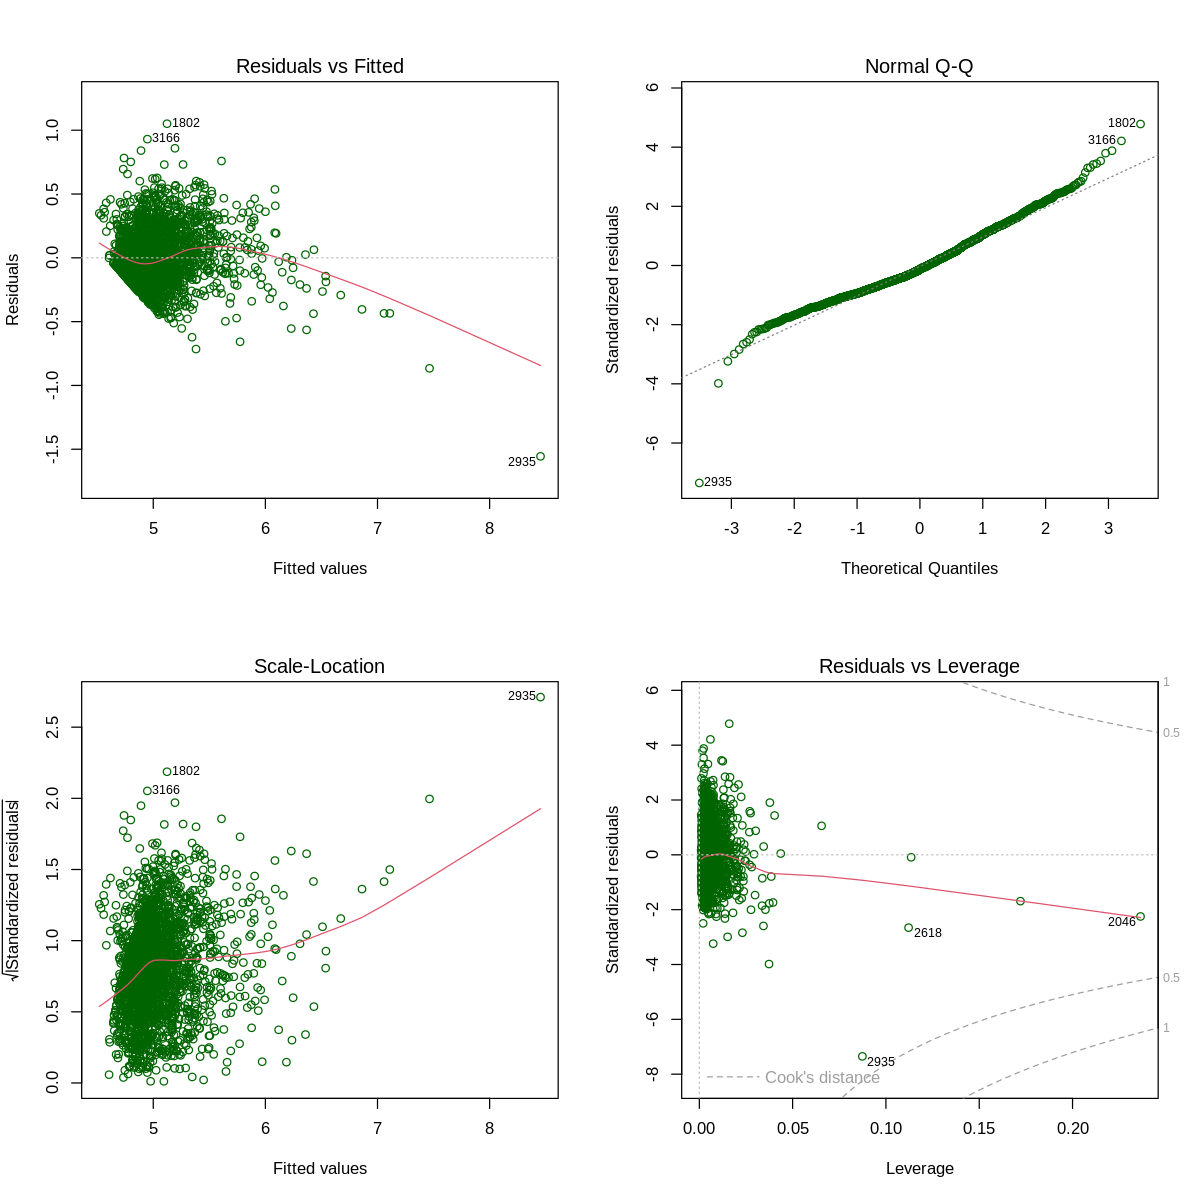

In [94]:
#Residual analysis

options(repr.plot.width = 10, repr.plot.height = 10)

par(mfrow=c(2,2))
plot(model_log,col='darkgreen')

In [95]:
model_log$fitted.values


1023      682     2192      936     1542      471     2364      270 
4.970083 4.711140 4.858025 5.003246 5.155295 5.081623 4.869115 4.948199 
    1219      599     1309     1989      330     1811     1625     1761 
4.894531 4.933578 5.113090 5.202908 5.057540 4.895883 5.443312 5.701835 
      37     1136      732      883      485     1840     2942     2447 
5.289359 5.386947 4.915642 4.955666 5.233955 4.875529 4.734329 5.110999 
     981     2869     2920     2999     2391     2395      554     1455 
5.650648 4.857721 5.348128 5.082228 4.856249 4.848022 4.954522 5.133109 
    2174     1963     2597     1539     2621     2957      343     2648 
4.890528 5.317717 4.941849 4.954983 5.017927 5.231861 4.885885 4.799490 
      40      537     2440      248     1230     2443     2102     2500 
5.218057 4.923346 5.029549 4.893223 5.033154 4.876725 4.901165 5.504885 
    2878     1423     1312     1707      526     2708     1075     1435 
5.337076 4.756537 5.134923 4.782060 4.726991 5.216305 4.976782 4.823470 
      22     1754     1778     2256     1403     2564     1135      989 
5.080661 5.081077 5.094576 4.858262 4.784434 5.091150 5.146087 4.939768 
    1803     1525     1650     1649      847      465     1002     1558 
4.970017 5.207382 4.863061 4.746265 4.935207 5.598020 4.860034 4.826354 
    1208     1141       84     1910     3121     1173     2316     2801 
6.367476 5.327115 5.150504 5.212262 4.838532 5.411952 4.904870 5.087418 
    3176     2686     1336      557     1696      287     2680     2394 
5.395120 5.303832 4.788577 4.999798 5.032916 4.912978 5.239174 5.033488 
    2552     2923     2919     1531      862     1854     2685      577 
4.898683 4.931977 5.001543 5.235924 5.505222 4.926588 5.162361 5.190632 
     996     3091      316     1081      736     1322     2716     3207 
4.966637 5.042758 5.264432 5.086684 5.037581 4.899498 5.207368 4.837598 
     815      961     2347     1175     2350     1717      501     2576 
5.197625 5.199398 4.939168 5.209941 5.187237 4.805851 4.757586 5.112861 
     536     2761      994     2805     1073     1031       29     1957 
5.272099 4.952401 4.973314 5.210470 5.204238 4.825886 5.000232 5.394058 
     842     1832     1663     2297     1325      574     1981      369 
4.914901 5.319278 5.253006 5.210226 4.858108 4.890720 5.084974 5.074421 
    2516       86     1516     2392     1656      355     1857     2880 
5.128685 5.132135 5.774333 4.982835 4.933924 4.924480 5.145145 4.854890 
    1079      361     1348     1274     2826     1855     2886      247 
5.033070 4.776990 5.142437 4.895397 4.980477 5.181715 4.892424 4.859511 
     754      219      135      111      532     2442      408     1598 
4.812495 4.950252 4.879377 4.705198 5.041902 4.822172 5.035917 5.075865 
     918     2532     2193     3116     1850      359     2168     1156 
4.945379 5.092529 4.950734 4.971365 4.963896 5.144432 4.981248 5.123406 
    2057     1108     1250     1226       19      273      418     2010 
5.711427 4.898827 5.041228 4.745632 5.082059 4.700727 5.086579 5.126890 
    1576     2484      871      689      403     1620     1046     1070 
5.074083 4.926720 5.385097 5.253844 4.833687 4.966269 5.282471 4.877470 
    1813      822     2670      637      667      722      500     2829 
5.182476 4.953688 4.889775 4.831924 5.608602 4.988881 5.544584 5.349708 
    2739     2293      423      421      995      140      126     1004 
5.167785 5.075671 4.873836 5.582951 4.739294 4.969106 4.889394 5.004752 
    3035     2336     1162     2643     1545      504     1490      358 
4.750116 4.897130 5.052331 4.766294 4.824899 4.957243 4.977896 4.795606 
     788     2190     2711     1581      305     1847     2478      987 
4.923536 4.956401 4.696538 5.206905 4.850724 4.967642 4.864731 4.732399 
    2642      129      309     3187      441     2924     3182      470 
4.764892 4.976412 5.061041 4.870498 5.896587 5.219627 5.017394 5.421153 
    2627     1368     1836     1802      349      900      592

In [96]:
#Predictions on train, vaildation, and test data
library(DMwR)

## Predict on Train and Validation
model_log_train_preds <- model_log$fitted.values 
model_log_validation_preds <- predict(object = model_log, newdata = validation_data_log)

## 
model_log_train_preds = exp(model_log_train_preds)
model_log_validation_preds = exp(model_log_validation_preds)

## Evaluate
regr.eval(trues = train_data$TotalRevenueGenerated, preds = model_log_train_preds)
regr.eval(trues = validation_data$TotalRevenueGenerated, preds = model_log_validation_preds)

mae          mse         rmse         mape 
  32.8381186 8775.1856814   93.6759611    0.1748376

mae          mse         rmse         mape 
  31.1193901 3232.7799027   56.8575404    0.1694368